In [204]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

In [1]:
data = yf.download("BTC-USD")[['Close']]
data.index = pd.to_datetime(data.index)
data.head().round(2)

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2014-09-17,457.33
2014-09-18,424.44
2014-09-19,394.80
2014-09-20,408.90
2014-09-21,398.82


In [225]:
data.shape

(2751, 1)

In [271]:
data.tail(5)

,Close
Date,
2022-03-25,44348.730469
2022-03-26,44500.828125
2022-03-27,46820.492188
2022-03-28,47128.003906
2022-03-29,47922.492188


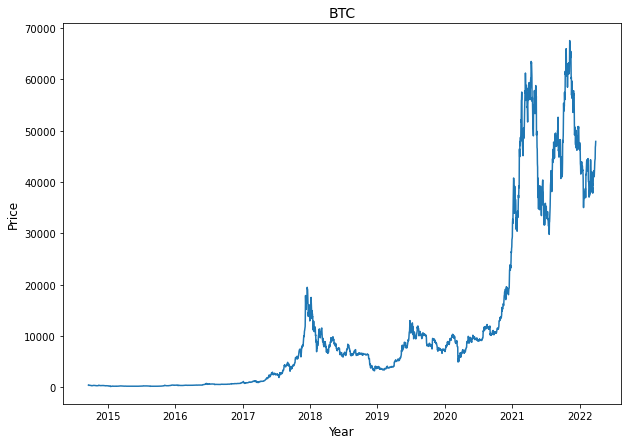

In [3]:
plt.figure(figsize=(10, 7))
plt.plot(data['Close'])
plt.title('BTC', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

In [4]:
result = adfuller(data.Close)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -0.80
5% Critical Value: -2.86
p-value: 0.82


In [ ]:
# Time series is not stationary as seen in the plot and with p>0.05 of ADF test.

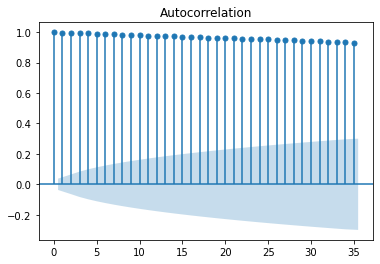

In [9]:
plot_acf(data.Close)
plt.show()

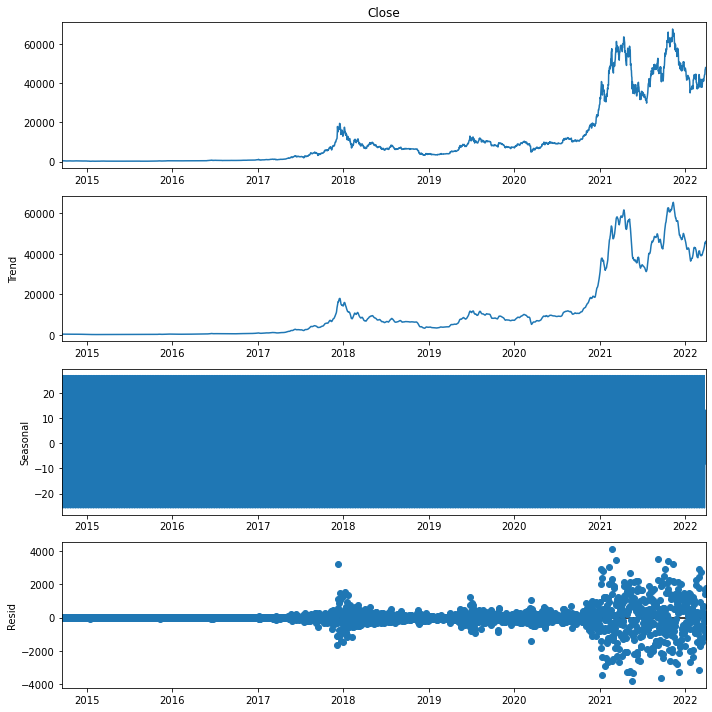

In [208]:
decompose = seasonal_decompose(data['Close'], model='additive', extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (10,10)})
decompose.plot()
plt.show()

In [ ]:
# The time series show significant autocorrelation.

In [242]:
data_diff=pd.DataFrame((np.log(data.Close)).diff().dropna())

In [211]:
data_diff

,Close
Date,
2014-09-18,-0.074643
2014-09-19,-0.072402
2014-09-20,0.035111
2014-09-21,-0.024968
2014-09-22,0.008317
...,...
2022-03-25,0.008783
2022-03-26,0.003424
2022-03-27,0.050813


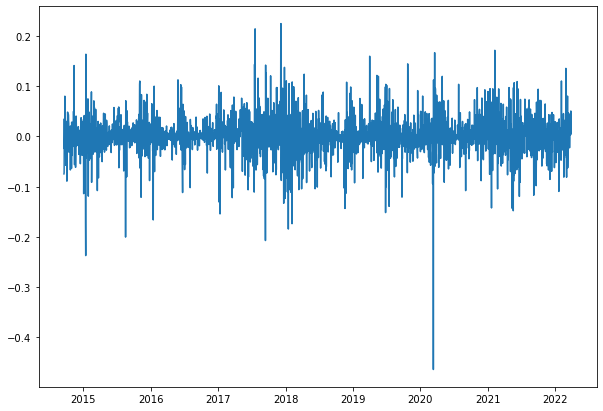

In [212]:
plt.figure(figsize=(10, 7))
plt.plot(data_diff)
plt.show()

In [243]:
adfuller(data_diff, autolag='AIC')


(-15.791367718592014,
 1.1011876509720085e-28,
 9,
 2740,
 {'1%': -3.43273884556851,
  '5%': -2.8625954199228967,
  '10%': -2.567331834008205},
 -9912.418735454783)

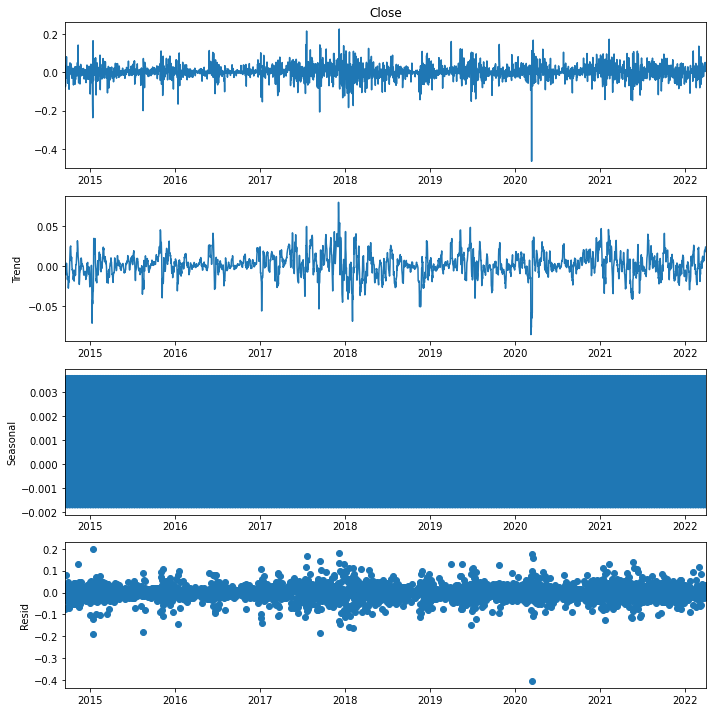

In [214]:
decompose_diff =seasonal_decompose(data_diff['Close'], model='additive', extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (10,10)})
decompose_diff.plot()
plt.show()


In [215]:
from pmdarima import auto_arima
stepwise_model = auto_arima(data_diff, start_p=1, start_q=1,
                           d=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, seasonal=False, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8052.804, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8881.683, Time=0.42 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8054.803, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-9227.451, Time=0.31 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-9412.454, Time=0.36 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-9522.383, Time=0.36 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-9637.803, Time=0.80 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-9908.841, Time=3.12 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-9936.389, Time=4.21 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-9983.926, Time=2.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.56 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.27 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=i

In [91]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# First to see if my forecast fits the test, I'm splitting the data to train and test and running the tests on these.

In [216]:
split = len(data_diff) - 10
train, test = data_diff[0:split], data_diff[split:]

In [217]:
model= ARIMA(train, order=(3, 1, 1)).fit()
print(model.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.81786D+00    |proj g|=  1.45142D+01


 This problem is unconstrained.



At iterate    5    f= -1.81788D+00    |proj g|=  4.68566D-01

At iterate   10    f= -1.81789D+00    |proj g|=  7.23037D+00

At iterate   15    f= -1.81810D+00    |proj g|=  1.30365D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   20    f= -1.81812D+00    |proj g|=  2.25955D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     62      2     0     0   2.260D-03  -1.818D+00
  F =  -1.8181164400466603     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2739
Model:                 ARIMA(3, 1, 1)   Log Likelihood                4979.821
Method:                       css-mle   S.D. of innovations              0.039
Date:                Wed, 30 Mar 2022   AIC  

In [218]:
pred=model.predict(len(train), len(data_diff)-1)

In [219]:
pred

2022-03-20   -0.010057
2022-03-21    0.000449
2022-03-22    0.000017
2022-03-23   -0.000039
2022-03-24    0.000004
2022-03-25    0.000002
2022-03-26    0.000001
2022-03-27    0.000001
2022-03-28    0.000001
2022-03-29    0.000001
Freq: D, dtype: float64

In [130]:
from statsmodels.tools.eval_measures import rmse

In [220]:
rmse(pred, test)

array([0.02966369, 0.02261223, 0.02284985, 0.02288142, 0.02285731,
       0.02285864, 0.02285889, 0.02285878, 0.02285879, 0.02285879])

In [ ]:
# RMSE values are small so the model looks good. Now, let's model it on the entire dataset and predict for the next 
# 5 periods.

In [221]:
model= ARIMA(data_diff, order=(3, 1, 1)).fit()
print(model.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.81907D+00    |proj g|=  1.45252D+01

At iterate    5    f= -1.81909D+00    |proj g|=  4.70228D-01

At iterate   10    f= -1.81910D+00    |proj g|=  7.26049D+00

At iterate   15    f= -1.81931D+00    |proj g|=  1.22752D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   20    f= -1.81932D+00    |proj g|=  1.99791D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     62      2     0     0   1.998D-03  -1.819D+00
  F =  -1.8193246160777055     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2749
Model:                 ARIMA(3, 1, 1)   Log Likelihood                5001.323
Method:                       css-mle   S.D. of innovations              0.039
Date:                Wed, 30 Mar 2022   AIC  

In [250]:
forecast=model.predict(len(data_diff), len(data_diff)+4)

In [233]:
rmse(data_diff, forecast)

array([0.03990236, 0.04288039, 0.03917542, 0.03917689, 0.03918585])

In [251]:
forecast=pd.DataFrame(forecast)

In [263]:
data_log=pd.DataFrame(np.log(data.Close))
data_log

,Close
Date,
2014-09-17,6.125414
2014-09-18,6.050771
2014-09-19,5.978369
2014-09-20,6.013480
2014-09-21,5.988513
...,...
2022-03-25,10.699839
2022-03-26,10.703263
2022-03-27,10.754076


In [252]:
forecast

,0
2022-03-30,-0.015810
2022-03-31,0.000182
2022-04-01,0.000144
2022-04-02,-0.000068
2022-04-03,0.000004


In [254]:
data_log.iloc[-1]

Close    10.77734
Name: 2022-03-29 00:00:00, dtype: float64

In [255]:
add=np.array(forecast[0])
add

array([-1.58096589e-02,  1.81779475e-04,  1.43968472e-04, -6.81397240e-05,
        3.54996856e-06])

In [264]:
for i in add:
    new_data=data_log.iloc[-1]+i
    data_log=data_log.append(new_data, ignore_index=True)
print(data_log.iloc[-6:-])

          Close
2750  10.777340
2751  10.761531
2752  10.761712
2753  10.761856
2754  10.761788


In [268]:
data_log.tail(5)

,Close
2751,10.761531
2752,10.761712
2753,10.761856
2754,10.761788
2755,10.761792


In [269]:
data_pred=np.exp(data_log)


In [272]:
data_pred.tail(10)

,Close
2746,44348.730469
2747,44500.828125
2748,46820.492188
2749,47128.003906
2750,47922.492187
2751,47170.811498
2752,47179.386962
2753,47186.179796
2754,47182.964652
2755,47183.132150


In [ ]:
# I don't recommend to buy BTC because the forecast for the next 5 days looks like it is dropping.